In [45]:
# final_merged_data.to_csv('final_road_accident_data.csv',index=False)
import pandas as pd
import numpy as np

In [49]:
# reading csv data
final_merged_data=pd.read_csv('/content/final_road_accident_data (1).csv')

/tmp/ipython-input-2358760121.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  final_merged_data=pd.read_csv('/content/final_road_accident_data (1).csv')


In [50]:
final_merged_data.head(4)

collision_index  collision_year collision_ref_no  location_easting_osgr  \
0   2025131604762            2025        131604762               403777.0   
1   2025131604762            2025        131604762               403777.0   
2   2025131604763            2025        131604763               422367.0   
3   2025131604953            2025        131604953               433928.0   

   location_northing_osgr  longitude  latitude  police_force  \
0                431259.0   -1.94417  53.77765            13   
1                431259.0   -1.94417  53.77765            13   
2                420644.0   -1.66284  53.68178            13   
3                421517.0   -1.48772  53.68901            13   

   collision_severity  number_of_vehicles  ...  age_of_driver  \
0                   2                   1  ...             23   
1                   2                   1  ...             23   
2                   2                   3  ...             41   
3                   2                   3  ...             61   

  age_band_of_driver  engine_capacity_cc propulsion_code  age_of_vehicle  \
0                  5                  -1              -1              -1   
1                  5                  -1              -1              -1   
2                  7                  -1              -1              -1   
3                  9                  -1              -1              -1   

  generic_make_model driver_imd_decile lsoa_of_driver  escooter_flag  \
0                 -1                 1      E01010996              0   
1                 -1                 1      E01010996              0   
2                 -1                 2      E01011234              0   
3                 -1                 1      E01011747              0   

   driver_distance_banding  
0                        2  
1                        2  
2                        3  
3                        3  

[4 rows x 92 columns]

# Preprocessing The DataSet

In [51]:
final_merged_data.columns

Index(['collision_index', 'collision_year', 'collision_ref_no',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'collision_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'local_authority_highway_current',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail_historic', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control_historic',
       'pedestrian_crossing_physical_facilities_historic',
       'pedestrian_crossing', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards_historic', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
 

In [52]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27511 entries, 0 to 27510
Data columns (total 92 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   collision_index                                   27511 non-null  object 
 1   collision_year                                    27511 non-null  int64  
 2   collision_ref_no                                  27511 non-null  object 
 3   location_easting_osgr                             27511 non-null  float64
 4   location_northing_osgr                            27511 non-null  float64
 5   longitude                                         27511 non-null  float64
 6   latitude                                          27511 non-null  float64
 7   police_force                                      27511 non-null  int64  
 8   collision_severity                                27511 non-null  int64  
 9   number_of_vehicle

In [53]:
# maping -1 age to np.nan which is not standerd coding
final_merged_data['age_of_driver']=final_merged_data['age_of_driver'].replace(-1,np.nan)
final_merged_data['speed_limit']=final_merged_data['speed_limit'].replace(-1,np.nan)
final_merged_data['junction_detail']=final_merged_data['junction_detail'].replace(-1,np.nan)


In [54]:
for i in range(9):
  final_merged_data['age_of_driver']=final_merged_data['age_of_driver'].replace(i,np.nan)

for i in range(100,int(final_merged_data['age_of_driver'].max())+1):
  final_merged_data['age_of_driver']=final_merged_data['age_of_driver'].replace(i,np.nan)

In [55]:
# letss check null value
null_count=final_merged_data.isnull().sum()
null_count[null_count>0].sort_values(ascending=False)

junction_detail    1598
age_of_driver      1398
speed_limit         193
dtype: int64

In [56]:
final_merged_data.dropna(inplace=True)

In [57]:
null_count=final_merged_data.isnull().sum()
null_count[null_count>0].sort_values(ascending=False)

Series([], dtype: int64)

In [58]:
# checking duplicates
final_merged_data.duplicated().sum()

np.int64(0)

In [59]:
final_merged_data['date']

0        2025-06-18
1        2025-06-18
2        2025-06-18
3        2025-06-19
5        2025-06-19
            ...    
27506    2025-04-28
27507    2025-02-17
27508    2025-06-11
27509    2025-06-11
27510    2025-06-30
Name: date, Length: 24416, dtype: object

In [60]:
# converting data type of date from object to date data type for formating
# from saparate date and time to merged datetime
final_merged_data['date']=pd.to_datetime(final_merged_data['date'],format='%Y-%m-%d')
final_merged_data['datetime_of_collision']=pd.to_datetime(final_merged_data['date'].dt.strftime('%Y-%m-%d')+' '+final_merged_data['time'])

final_merged_data.drop(columns=['date'],inplace=True)
final_merged_data.drop(columns=['time'],inplace=True)

In [61]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24416 entries, 0 to 27510
Data columns (total 91 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   collision_index                                   24416 non-null  object        
 1   collision_year                                    24416 non-null  int64         
 2   collision_ref_no                                  24416 non-null  object        
 3   location_easting_osgr                             24416 non-null  float64       
 4   location_northing_osgr                            24416 non-null  float64       
 5   longitude                                         24416 non-null  float64       
 6   latitude                                          24416 non-null  float64       
 7   police_force                                      24416 non-null  int64         
 8   collision_severity             

In [62]:
final_merged_data.head()

collision_index  collision_year collision_ref_no  location_easting_osgr  \
0   2025131604762            2025        131604762               403777.0   
1   2025131604762            2025        131604762               403777.0   
2   2025131604763            2025        131604763               422367.0   
3   2025131604953            2025        131604953               433928.0   
5   2025131605017            2025        131605017               434403.0   

   location_northing_osgr  longitude  latitude  police_force  \
0                431259.0   -1.94417  53.77765            13   
1                431259.0   -1.94417  53.77765            13   
2                420644.0   -1.66284  53.68178            13   
3                421517.0   -1.48772  53.68901            13   
5                419529.0   -1.48075  53.67111            13   

   collision_severity  number_of_vehicles  ...  age_band_of_driver  \
0                   2                   1  ...                   5   
1                   2                   1  ...                   5   
2                   2                   3  ...                   7   
3                   2                   3  ...                   9   
5                   2                   1  ...                   7   

   engine_capacity_cc  propulsion_code age_of_vehicle generic_make_model  \
0                  -1               -1             -1                 -1   
1                  -1               -1             -1                 -1   
2                  -1               -1             -1                 -1   
3                  -1               -1             -1                 -1   
5                  -1               -1             -1                 -1   

  driver_imd_decile  lsoa_of_driver  escooter_flag  driver_distance_banding  \
0                 1       E01010996              0                        2   
1                 1       E01010996              0                        2   
2                 2       E01011234              0                        3   
3                 1       E01011747              0                        3   
5                 3       E01011908              0                        1   

   datetime_of_collision  
0    2025-06-18 23:05:00  
1    2025-06-18 23:05:00  
2    2025-06-18 18:12:00  
3    2025-06-19 11:27:00  
5    2025-06-19 12:30:00  

[5 rows x 91 columns]

In [63]:
final_merged_data.describe()

collision_year  location_easting_osgr  location_northing_osgr  \
count         24416.0           24416.000000            2.441600e+04   
mean           2025.0          445370.061230            3.193232e+05   
min            2025.0           75011.000000            7.460800e+04   
25%            2025.0          399857.500000            2.230248e+05   
50%            2025.0          450135.000000            2.900130e+05   
75%            2025.0          506693.250000            3.613440e+05   
max            2025.0          655126.000000            1.144900e+06   
std               0.0           94435.002345            1.455818e+05   

          longitude      latitude  police_force  collision_severity  \
count  24416.000000  24416.000000  24416.000000        24416.000000   
mean      -1.348312     52.761201     39.581381            2.663213   
min       -7.440790     50.570310     13.000000            1.000000   
25%       -2.003535     51.886295     22.000000            2.000000   
50%       -1.257515     52.502235     35.000000            3.000000   
75%       -0.429955     53.143637     43.000000            3.000000   
max        1.755590     60.185810     99.000000            3.000000   
std        1.410581      1.308141     22.837352            0.521957   

       number_of_vehicles  number_of_casualties   day_of_week  ...  \
count        24416.000000          24416.000000  24416.000000  ...   
mean             1.927998              1.748894      4.128358  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              2.000000      6.000000  ...   
max             12.000000             22.000000      7.000000  ...   
std              0.769462              1.461969      1.965854  ...   

       age_of_driver  age_band_of_driver  engine_capacity_cc  propulsion_code  \
count   24416.000000        24416.000000             24416.0          24416.0   
mean       41.400066            6.959862                -1.0             -1.0   
min         9.000000            2.000000                -1.0             -1.0   
25%        27.000000            6.000000                -1.0             -1.0   
50%        39.000000            7.000000                -1.0             -1.0   
75%        54.000000            8.000000                -1.0             -1.0   
max        99.000000           11.000000                -1.0             -1.0   
std        18.025172            1.974906                 0.0              0.0   

       age_of_vehicle  generic_make_model  driver_imd_decile  escooter_flag  \
count         24416.0             24416.0       24416.000000   24416.000000   
mean             -1.0                -1.0           4.309510       0.011755   
min              -1.0                -1.0          -1.000000       0.000000   
25%              -1.0                -1.0           1.000000       0.000000   
50%              -1.0                -1.0           4.000000       0.000000   
75%              -1.0                -1.0           7.000000       0.000000   
max              -1.0                -1.0          10.000000       1.000000   
std               0.0                 0.0           3.452305       0.107782   

       driver_distance_banding          datetime_of_collision  
count             24416.000000                          24416  
mean                  1.576589  2025-04-02 09:49:48.826179328  
min                  -1.000000            2025-01-01 00:40:00  
25%                   1.000000            2025-02-17 07:47:30  
50%                   1.000000            2025-04-02 17:45:00  
75%                   3.000000            2025-05-16 18:28:45  
max                   5.000000            2025-06-30 23:25:00  
std                   1.579367                            NaN  

[8 rows x 83 columns]

In [64]:
catagorical_features=[]
numerical_feature=[]

for i in final_merged_data.columns:
  if final_merged_data[i].dtype=='O':
    catagorical_features.append(i)
  else:
    numerical_feature.append(i)

print(catagorical_features)
print(numerical_feature)

['collision_index', 'collision_ref_no', 'local_authority_ons_district', 'local_authority_highway', 'local_authority_highway_current', 'lsoa_of_accident_location', 'lsoa_of_casualty', 'lsoa_of_driver']
['collision_year', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'collision_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'local_authority_district', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail_historic', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control_historic', 'pedestrian_crossing_physical_facilities_historic', 'pedestrian_crossing', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards_historic', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'enhanced_severity_collision', 'co

In [65]:
print("catagorical_features:",len(catagorical_features))
print("numerical_feature:",len(numerical_feature))

catagorical_features: 8
numerical_feature: 83


# Visualisation

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

### Note All the coding of the coloumns asr availible on my github (STATS20_2024_specification)

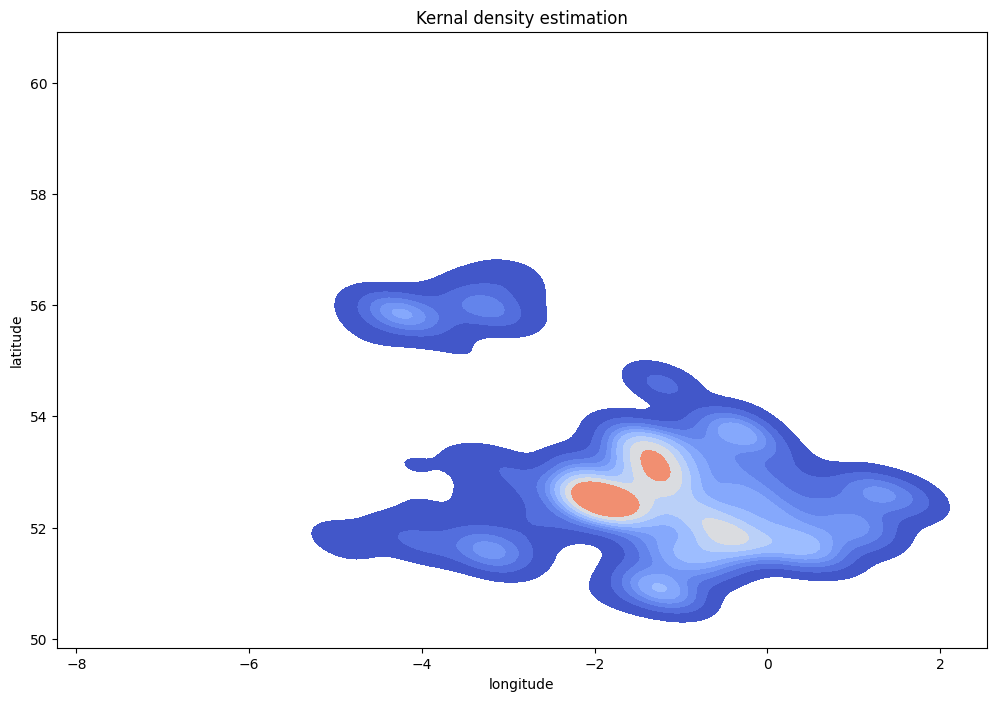

In [67]:
# Kernal density estimation for showing region of high Accedent Area
plt.figure(figsize=(12,8))
sns.kdeplot(x=final_merged_data['longitude'],y=final_merged_data['latitude'] ,fill=True, cmap='coolwarm')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Kernal density estimation')
plt.show()

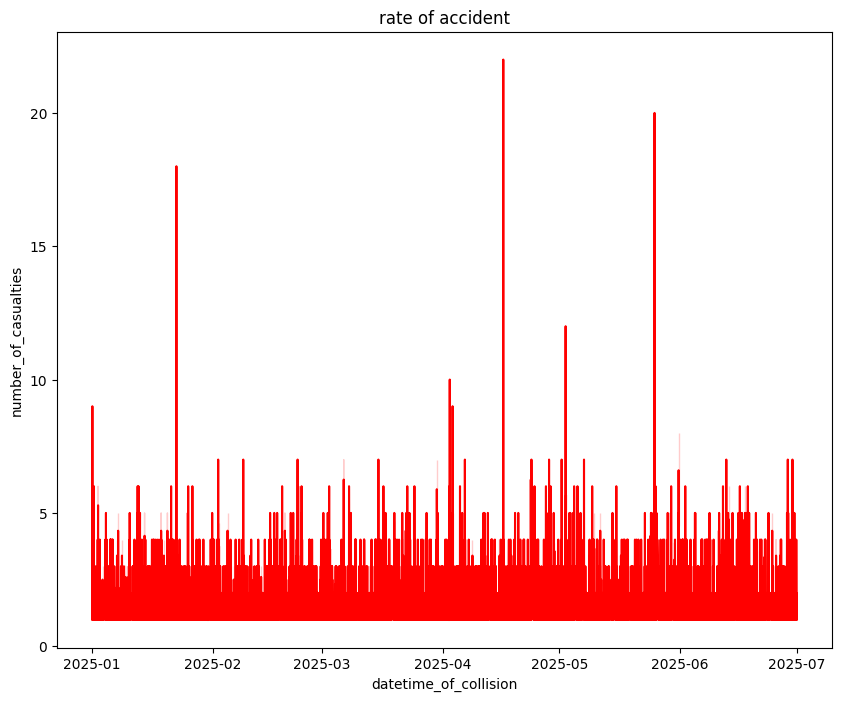

In [68]:
# number_of_casualties over time
plt.figure(figsize=(10,8))
sns.lineplot(x=final_merged_data['datetime_of_collision'],y=final_merged_data['number_of_casualties'] ,color='red')
plt.xlabel('datetime_of_collision')
plt.ylabel('number_of_casualties')
plt.title('rate of accident')
plt.show()

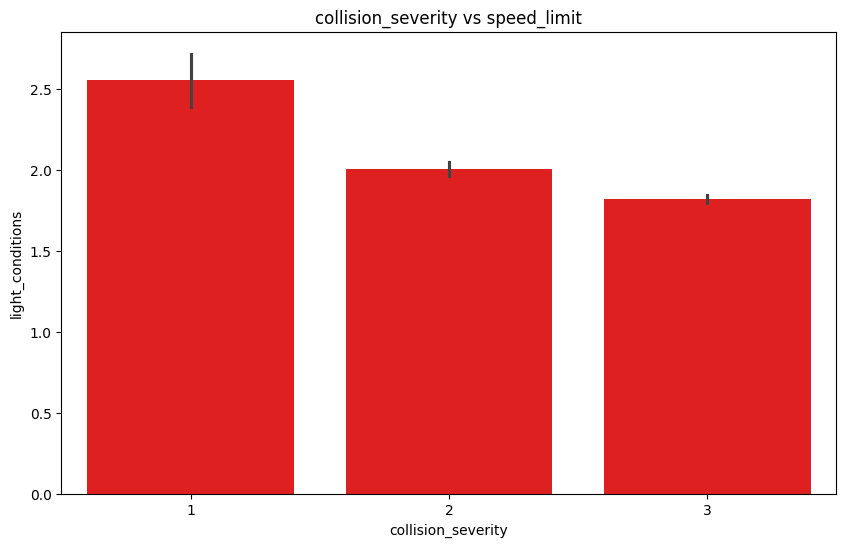

In [69]:
# collision_severity based on light_conditions
plt.figure(figsize=(10,6))
sns.barplot(x=final_merged_data['collision_severity'],y=final_merged_data['light_conditions'] ,color='red')
plt.xlabel('collision_severity')
plt.ylabel('light_conditions')
plt.title('collision_severity vs speed_limit')
plt.show()

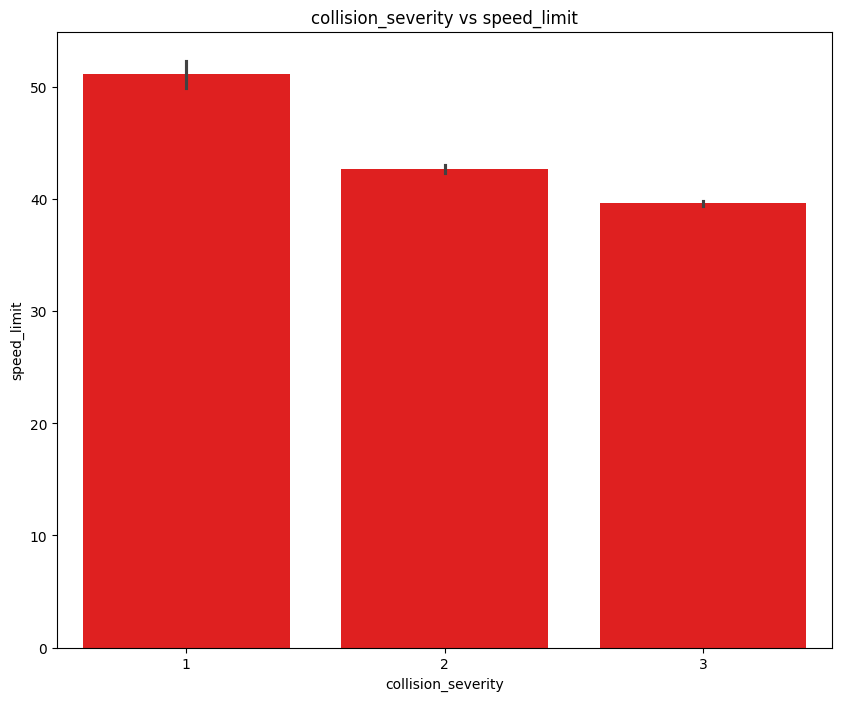

In [70]:
# collision_severity based on light_conditions
plt.figure(figsize=(10,8))
sns.barplot(x=final_merged_data['collision_severity'],y=final_merged_data['speed_limit'] ,color='red')
plt.xlabel('collision_severity')
plt.ylabel('speed_limit')
plt.title('collision_severity vs speed_limit')
plt.show()

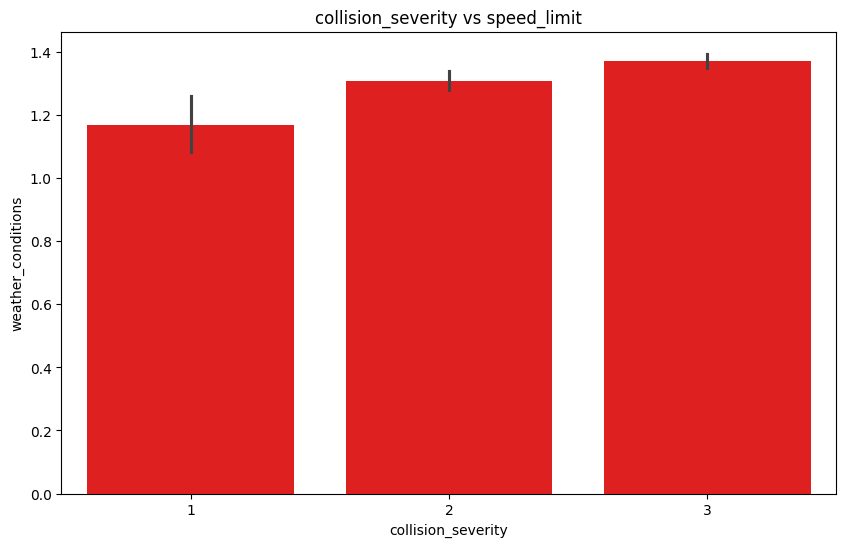

In [71]:
# collision_severity based on weather_conditions
plt.figure(figsize=(10,6))
sns.barplot(x=final_merged_data['collision_severity'],y=final_merged_data['weather_conditions'] ,color='red')
plt.xlabel('collision_severity')
plt.ylabel('weather_conditions')
plt.title('collision_severity vs speed_limit')
plt.show()

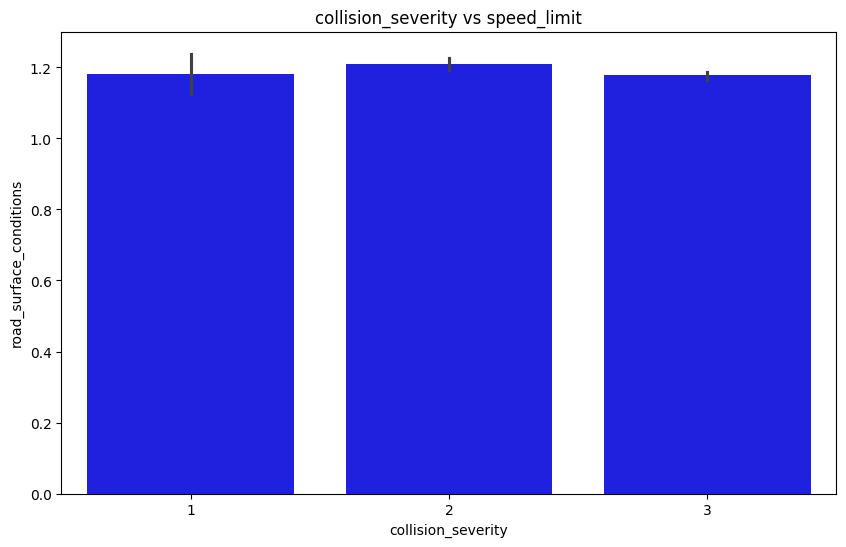

In [72]:
# collision_severity based on weather_conditions
plt.figure(figsize=(10,6))
sns.barplot(x=final_merged_data['collision_severity'],y=final_merged_data['road_surface_conditions'] ,color='blue')
plt.xlabel('collision_severity')
plt.ylabel('road_surface_conditions')
plt.title('collision_severity vs speed_limit')
plt.show()

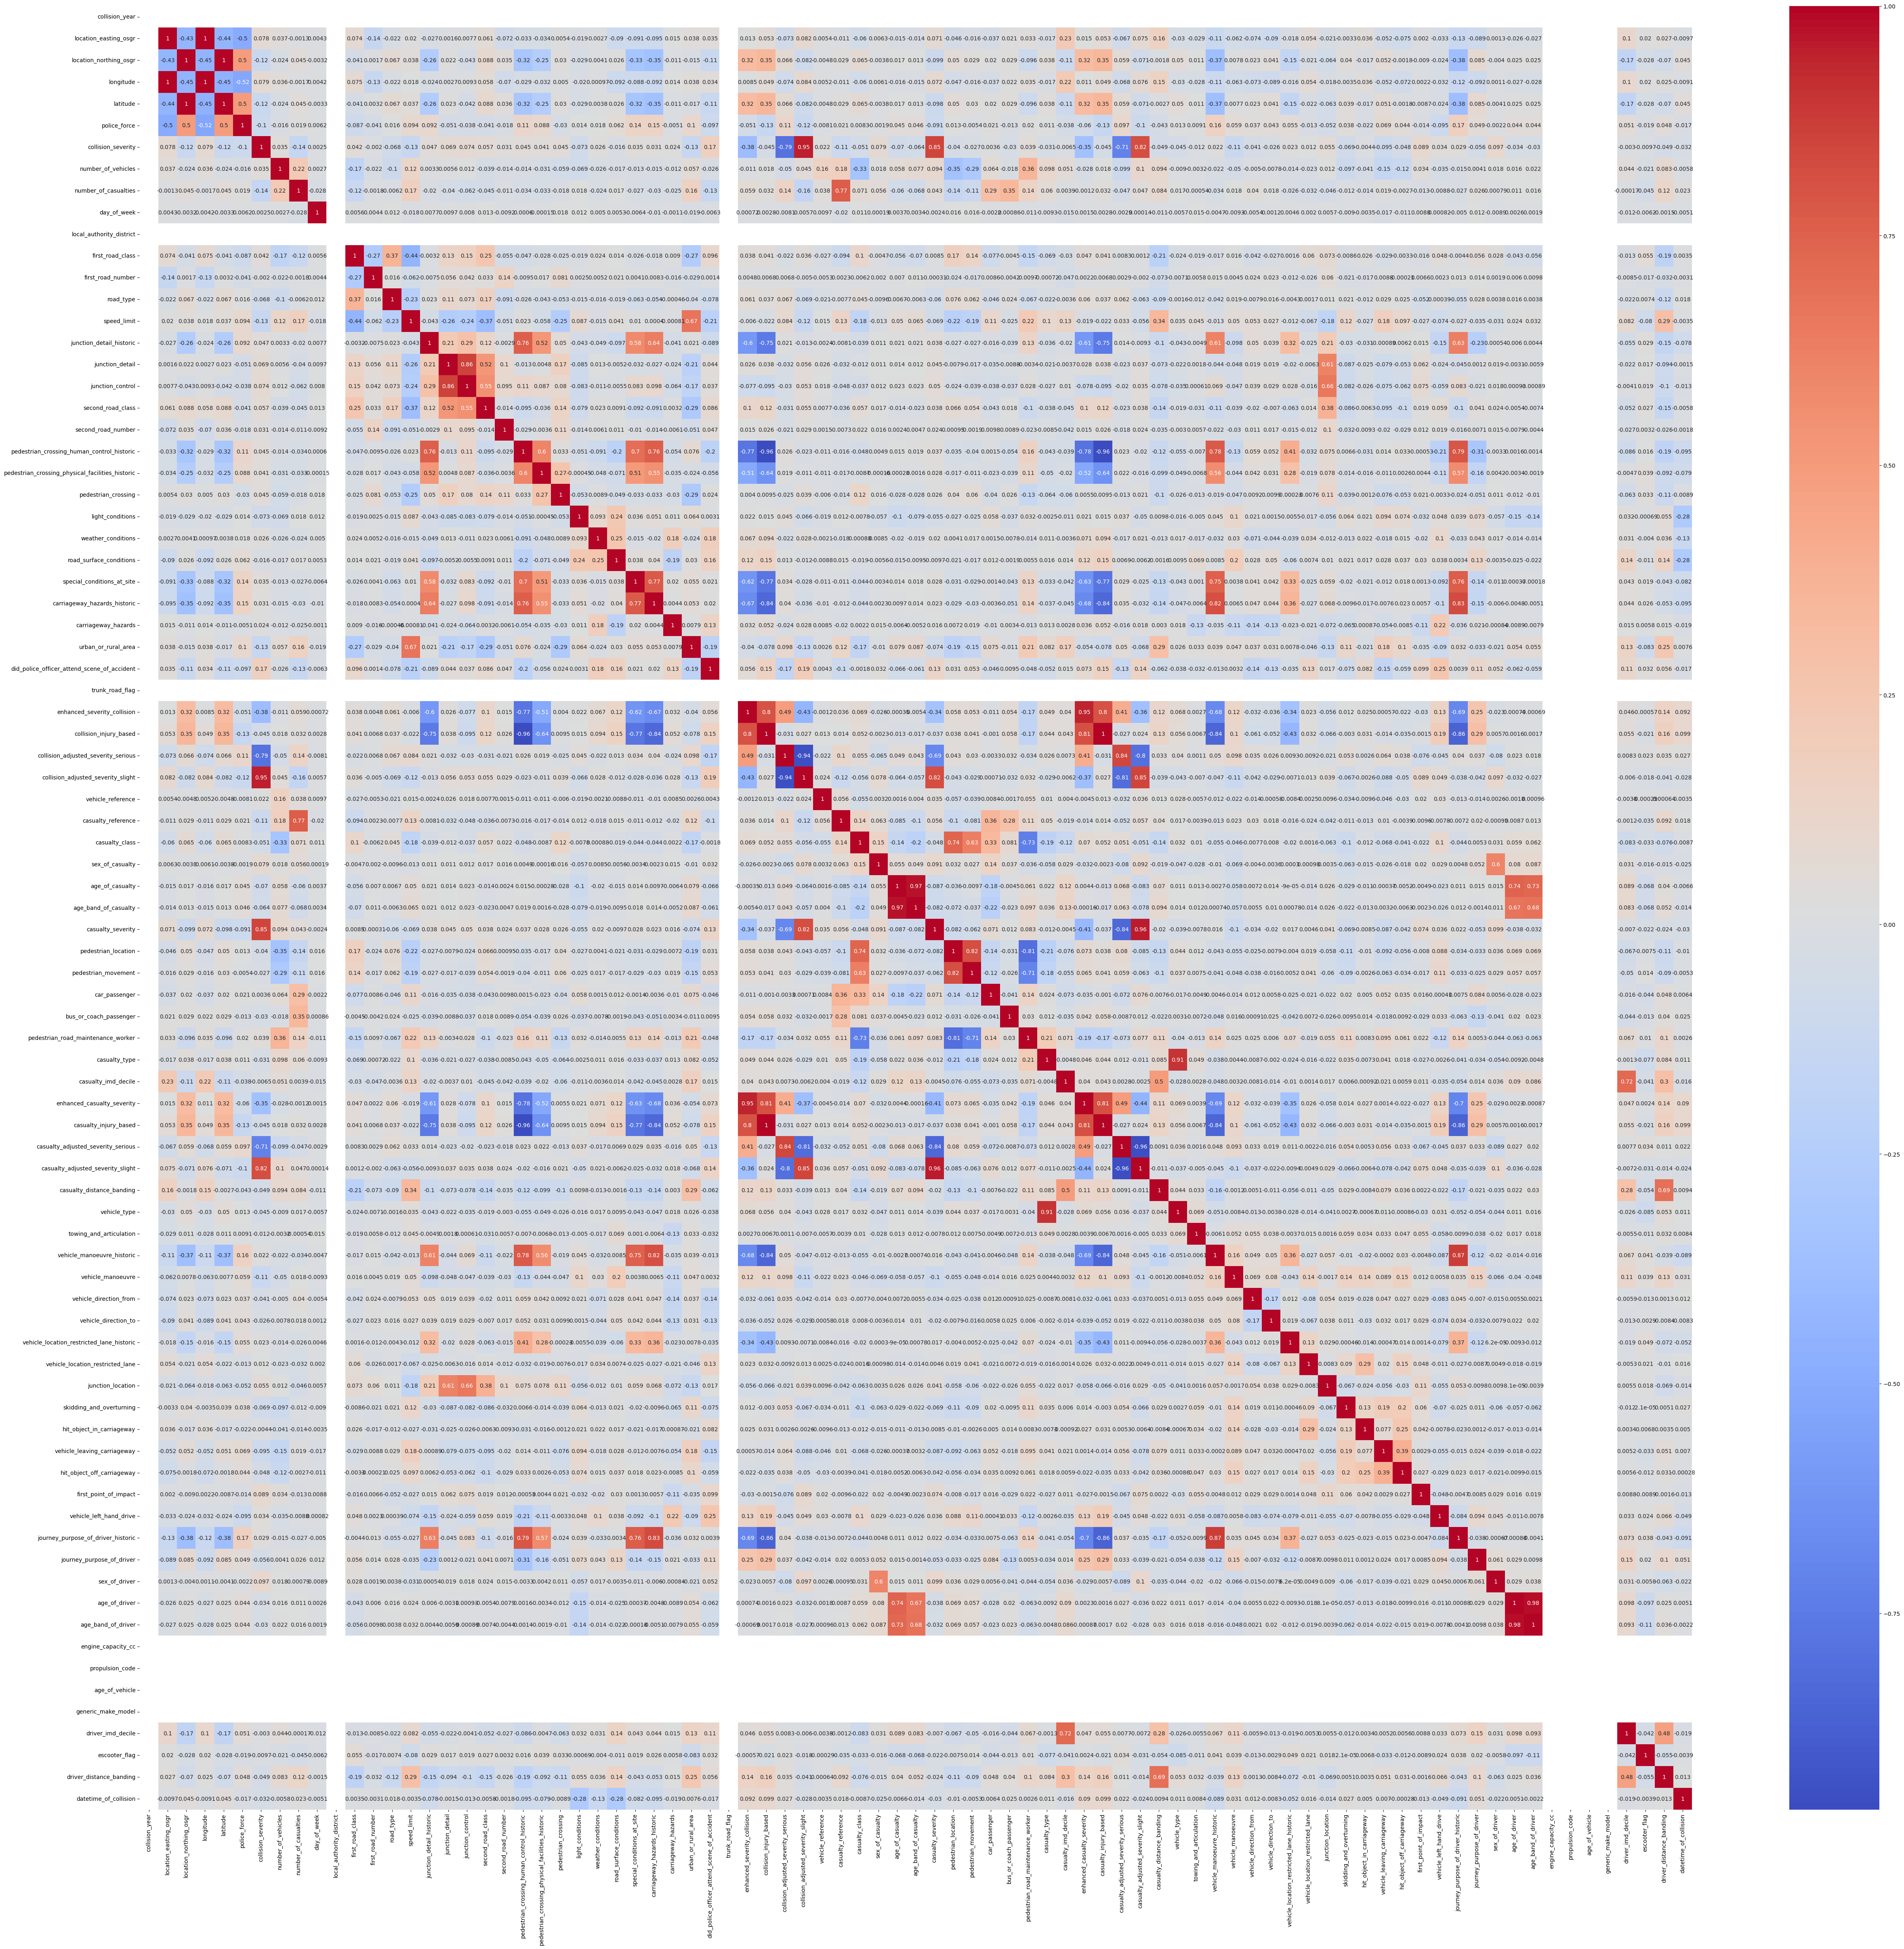

In [73]:
# ploting heatmap correlation for finding colomns dependence
plt.figure(figsize=(62,58))
sns.heatmap(final_merged_data[numerical_feature].corr(),annot=True, cmap='coolwarm')
plt.show()

In [74]:
# these feature are required for future training because it is leak proof
features1_2=['latitude','longitude']
features1_1=['day_of_week','hour_of_day','datetime_of_collision']
features2=['weather_conditions','light_conditions','road_surface_conditions','road_type','speed_limit','junction_detail']
features3=['urban_or_rural_area','local_authority_district','collision_year','junction_control','pedestrian_crossing','carriageway_hazards','trunk_road_flag','collision_severity','number_of_vehicles','number_of_casualties']

target= 'collision_severity'

# Accident risk and hotspot prediction

#### a) Accident risk

In [75]:
# checks peak hours for accedental risk
final_merged_data['hour_of_day']=final_merged_data['datetime_of_collision'].dt.hour
hour_wise_colllision=final_merged_data['hour_of_day'].value_counts()
hour_wise_colllision.sort_values(ascending=False)

hour_of_day
16    2137
15    2125
17    2066
18    1681
14    1640
8     1600
13    1549
12    1513
11    1268
19    1254
10    1122
9     1029
7      961
20     913
21     801
22     639
23     498
6      428
0      349
5      206
1      199
4      149
2      145
3      144
Name: count, dtype: int64

conclusion from analysis of hours for accedental risk:
- Mostly Accedents occurs at day time.
- arrount office start hours (8PM-10AM) and end hours(3PM-6PM) most of the Accedents are occuring.


Note: Above time hour is in 24 hour format

In [76]:
# day wise for accedental risk
day_dict={1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday'}

day_wise_accedent_count=final_merged_data['day_of_week'].value_counts().sort_index(ascending=True)
day_wise_accedent_count.index=day_wise_accedent_count.index.map(day_dict)
day_wise_accedent_count.sort_values(ascending=False)

day_of_week
Friday       3986
Thursday     3665
Wednesday    3570
Saturday     3501
Tuesday      3386
Monday       3304
Sunday       3004
Name: count, dtype: int64

conclusion from analysis of day wise for accedental risk:
- Mostly Accedents occurs at friday.
- Minimum accedents occurs at Monday (It may because Sunday is holiday. Which improves mental health and relaxation).

### b) hotspot prediction

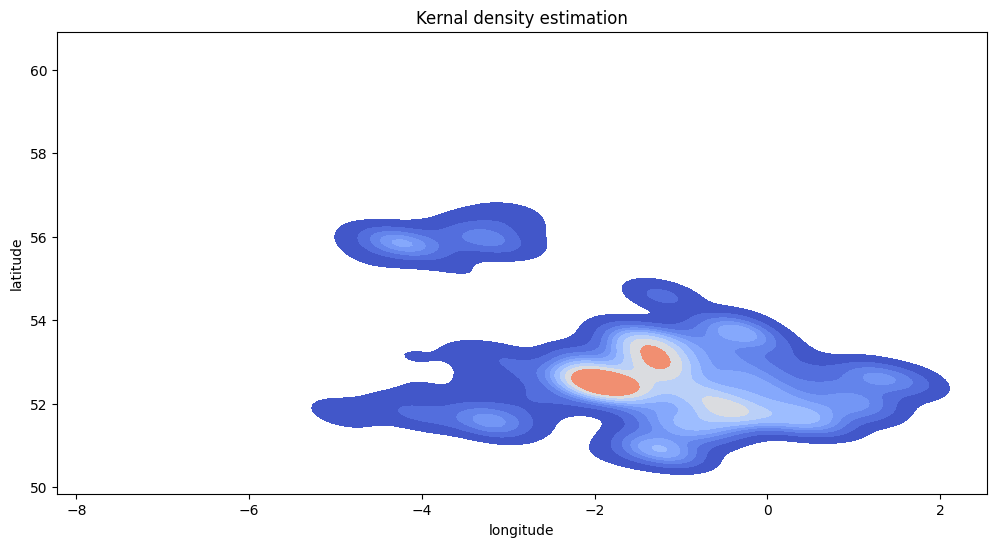

In [77]:
# Kernal density estimation for showing region of high Accident Area
plt.figure(figsize=(12,6))
sns.kdeplot(x=final_merged_data['longitude'],y=final_merged_data['latitude'] ,fill=True, cmap='coolwarm')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Kernal density estimation')
plt.show()

hotspot prediction:
- Kernal density estimation for showing region of high Accident Area.
- It uses latitude and longitude of accedent.

# Traffic flow and congestion analysis

In [78]:
# checking Average number of vehicle basesd on some condition
'day_of_week','hour_of_day'
hourly_traffic=final_merged_data.groupby('hour_of_day')['number_of_vehicles'].mean().sort_values(ascending=False)
daily_trafic=final_merged_data.groupby('day_of_week')['number_of_vehicles'].mean().sort_values(ascending=False)
traffic_based_on_weather_conditions=final_merged_data.groupby('weather_conditions')['number_of_vehicles'].mean().sort_values(ascending=False)


display(hourly_traffic)
display(daily_trafic)
display(traffic_based_on_weather_conditions)

hour_of_day
10    2.002674
7     1.996878
11    1.992114
18    1.987507
16    1.986898
12    1.972241
8     1.966875
14    1.966463
17    1.963698
13    1.945771
15    1.932235
9     1.930029
6     1.918224
20    1.875137
19    1.874801
21    1.868914
5     1.825243
22    1.712050
4     1.711409
23    1.700803
0     1.659026
2     1.579310
3     1.548611
1     1.467337
Name: number_of_vehicles, dtype: float64

day_of_week
4    1.949580
6    1.942047
3    1.929415
2    1.923729
5    1.918963
7    1.914881
1    1.913116
Name: number_of_vehicles, dtype: float64

weather_conditions
 3    1.982609
 1    1.938681
 2    1.893041
 8    1.891761
 7    1.880000
-1    1.799517
 5    1.773438
 4    1.718750
 9    1.680365
 6    1.200000
Name: number_of_vehicles, dtype: float64

### Conclusion from analysis of Traffic
1) based on hours of day:
- Mostly Traffic occurs at day time.
- arround office start hours (10-12AM) and end hours(7PM-9PM) most of the Accedents are occuring.

Note: Above time hour is in 24 hour format


2) based on days of week:
- Maximum Traffic occurs at Wednesday and Friday.
3) based on weather condition:
- when weather with 3 or 1 or 2 or 8 occurs then maximum traffic occurs.


```
1:Fine without high winds
2:Raining without high winds
3:Snowing without high winds
4:Fine with high winds
5:Raining with high winds
6:Snowing with high winds
7:Fog or mist - if hazard
8:Other
9:Unknown (self-reported only)

```




In [79]:
# Congestion Analysis

congestion=final_merged_data.groupby(['speed_limit','junction_detail'])['number_of_vehicles'].mean().sort_values(ascending=False)
display(congestion)

speed_limit  junction_detail
50.0         18.0               2.619048
60.0         17.0               2.535714
70.0         0.0                2.356981
             19.0               2.202128
50.0         13.0               2.150888
40.0         17.0               2.148148
             18.0               2.093023
60.0         16.0               2.079772
40.0         19.0               2.067797
50.0         16.0               2.064516
60.0         13.0               2.060606
70.0         13.0               2.039216
60.0         18.0               2.024390
50.0         0.0                2.020772
40.0         13.0               2.020537
             16.0               2.005051
             0.0                2.003042
70.0         17.0               2.000000
50.0         19.0               2.000000
             99.0               2.000000
70.0         18.0               2.000000
             16.0               2.000000
50.0         17.0               2.000000
20.0         99.0               2.000000
60.0         99.0               2.000000
30.0         16.0               1.947994
             13.0               1.892839
             18.0               1.876847
60.0         19.0               1.865169
20.0         16.0               1.863388
30.0         17.0               1.843023
             0.0                1.841830
             19.0               1.812852
60.0         0.0                1.803685
20.0         13.0               1.790221
             0.0                1.713326
             19.0               1.692308
             18.0               1.583333
             17.0               1.580645
30.0         99.0               1.500000
Name: number_of_vehicles, dtype: float64

### Conclusion from analysis of Congestion
- From the Above Data of junction detail and speed limit. We are decideng the Congestion.
- When speed limit is less and junction occcurs then we conclude it as congestion
- junction 17 and 18 found to be most congested when speed limit is more than 50.

Note:
1) 17:Junction, more than 4 arms (not a roundabout)
2) 18:Using private drive or entrance


# Decision support for traffic safety planning

In [80]:
final_merged_data.groupby('age_of_driver')['collision_severity'].mean().sort_values(ascending=False).head(10)

age_of_driver
98.0    3.000000
92.0    2.888889
9.0     2.851852
11.0    2.807692
10.0    2.781250
12.0    2.758621
29.0    2.748000
45.0    2.740291
40.0    2.736648
53.0    2.733746
Name: collision_severity, dtype: float64

### Conclusion
- After analysing the above result we can conclude that most of the people who  affected from accident, are of age group less then 18 or more than 90.
- we can generalise that young and old people are have high potential to get affect by accident.


traffic safety planning:
- we have to focuse on younger and old people.
- we have to give a proper trainning So that
A) younger people will get to know about rules of road.
B) Simmiler thing we can do for older people also.

# Model Training

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [82]:
feature_corr=['longitude','number_of_vehicles','first_road_class', 'junction_detail', 'junction_control','second_road_class',
                 'second_road_number', 'pedestrian_crossing', 'weather_conditions','road_surface_conditions', 'special_conditions_at_site','carriageway_hazards',
                  'did_police_officer_attend_scene_of_accident', 'pedestrian_road_maintenance_worker','vehicle_location_restricted_lane', 'junction_location',
                 'first_point_of_impact', 'vehicle_left_hand_drive','sex_of_driver','day_of_week']

optional_feat=['location_northing_osgr','junction_detail_historic','carriageway_hazards_historic','vehicle_manoeuvre_historic',]
target='collision_severity'

In [83]:
x=final_merged_data[feature_corr]
y=final_merged_data[target]



In [84]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)


In [85]:
model=RandomForestClassifier(n_estimators=500,random_state=42,class_weight='balanced')

In [86]:
model.fit(train_x,train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [87]:
predict=model.predict(test_x)

In [88]:
print(confusion_matrix(test_y,predict))

[[  50   15   53]
 [   8  587  802]
 [  14  276 3079]]


In [89]:
print(accuracy_score(test_y,predict))

0.7608517608517609


In [90]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           1       0.69      0.42      0.53       118
           2       0.67      0.42      0.52      1397
           3       0.78      0.91      0.84      3369

    accuracy                           0.76      4884
   macro avg       0.72      0.59      0.63      4884
weighted avg       0.75      0.76      0.74      4884



### Conclusion:

At n_estimator=100, accuracy=75.866%


  precision    recall  f1-score   support

           1       0.70      0.42      0.53       118
           2       0.67      0.43      0.52      1397
           3       0.78      0.91      0.84      3369

    accuracy                           0.76      4884


   macro avg       0.72      0.59      0.63      4884


weighted avg       0.75      0.76      0.74      4884



At n_estimator=500, accuracy=76.2%


              precision    recall  f1-score   support

           1       0.69      0.42      0.53       118
           2       0.67      0.42      0.52      1397
           3       0.78      0.91      0.84      3369

    accuracy                           0.76      4884


   macro avg       0.72      0.59      0.63      4884


weighted avg       0.75      0.76      0.74      4884

In [91]:
import pickle

In [92]:
pickle.dump(model,open('model.pkl','wb'))